In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams

from astropy.coordinates import SkyCoord
import astropy.units as u

In [10]:
fontsize = 35
labelsize = 35


rc("xtick", labelsize=fontsize)
rc("ytick", labelsize=fontsize)
rcParams["axes.linewidth"] = 5.3
rcParams["xtick.major.width"] = 5.3
rcParams["xtick.minor.width"] = 5.3
rcParams["ytick.major.width"] = 5.3
rcParams["ytick.minor.width"] = 5.3
rcParams["xtick.major.size"] = 12.5
rcParams["xtick.minor.size"] = 6.5
rcParams["ytick.major.size"] = 12.5
rcParams["ytick.minor.size"] = 6.5

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 50,
        }


cmap = plt.get_cmap('gnuplot2')
color_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
colors = [cmap(value) for value in color_values]

The idea is to make some plots that kind of "unify" everything I did in the masters. One of them is to plot the color fraction of galaxies (blue and red) in the clusters of Hydra Supercluster against the peak density of the clusters I obtained in the KNN density maps. <br>

For this I will need: <br>
i) A list of what clister I will use in this study - There are five I applied the galaxy cluster membership method, but just three of them are in the Supercluster according to the criteria we applied <br>
ii) The catalogues of galaxies in each cluster, obtained with the galaxy cluster membership method <br>
iii) The colors of the galaxies (magnitudes in at least two filters) <br>
iv) The peak density of the clusters <br>

First: what are the clusters I applied the membership method and what are their redshifts?

### Selecting clusters, their locations and redshifts

In [2]:
cl_names_mem = np.array(["Hydra", "Antlia", "AS0648", "AS0639", "A3443"])
cl_ra_mem = np.array([159.17417, 157.51461, 162.2862, 160.14115, 155.28746])
cl_dec_mem = np.array([-27.52444, -35.32341, -42.84817, -46.19478, -33.71903])

The right way of doing this would be to look for the name of the cluster inside the compilation of groups and clusters I built some time ago to get the right ascension, declination and redshift of the clusters. But I don't have the name of the clusters in that compilation. I still have to build it using the "ID" columns. For now, what I can do is to rely on the coordinates above and get the redshift of the cluster in the table which is closest to that ones.

In [6]:
g = pd.read_csv("../Groups-and-Clusters/Tables_Clusters_Combined_with_Redshift_Internally_Crossmatched.csv")

In [7]:
ra_g = np.asarray(g["RA"])
dec_g = np.asarray(g["DEC"])
z_g = np.asarray(g["z"])

In [50]:
cl_sep = []
for ra0, dec0 in zip(cl_ra_mem, cl_dec_mem):
    c0 = SkyCoord(ra=ra0, dec=dec0, frame='icrs', unit='deg')
    sep = np.array([c0.separation(SkyCoord(ra, dec, frame='icrs', unit='deg')).to(u.rad).value 
                            for ra, dec in zip(ra_g, dec_g)])
    sep_min = sep[~np.isnan(sep)].min()
    cl_sep.append(np.array([sep_min, ra_g[sep == sep_min][0], dec_g[sep == sep_min][0], z_g[sep == sep_min][0]]))
    
cl_sep = np.asarray(cl_sep)

In [59]:
np.rad2deg(cl_sep[:, 0])

array([0.        , 0.02142196, 1.09846048, 0.00484584, 0.55513481])

In [60]:
cl_sep[:, 3]

array([0.0126   , 0.01258  , 0.0168277, 0.0189   , 0.010837 ])

It seems that **"AS0648" and "A3443" don't have very good counterparts in the table**, with the closets ones being farther than 1.0º and 0.5º degrees respectively. These are exactly the ones I found to have too large redshifts (0.057 and 0.075 respectively) in NED. In summary, the clusters I will consider will be **just Hydra, Antlia and AS0639**. The problem is that the redshifts of Antlia and AS0639 are different from the ones I got in NED. This is the problem of using coordinates instead of the actual names of the clusters. <br>

For now I will use the redshifts from NED. They provide the references, so that is not a problem. It would just be cool if my compilation of groups and clusters worked as well. In the future I will need it to work better.

In [3]:
cl_names = np.array(["Hydra", "Antlia", "AS0639"])
cl_ra = np.array([159.17417, 157.51461, 160.14115])
cl_dec = np.array([-27.52444, -35.32341, -46.19478])
cl_z = np.array([0.012, 0.009767, 0.0211])

### Color distribution of the galaxies in the clusters

In [5]:
t_hydra = pd.read_csv("clusters-membership/table_membership_Hydra-rgu.csv", usecols=["g_petro", "r_petro", "u_petro", "Pmem"])

t_antlia = pd.read_csv("clusters-membership/table_membership_Antlia-rgu.csv", usecols=["g_petro", "r_petro", "u_petro", "Pmem"])

t_as0639 = pd.read_csv("clusters-membership/table_membership_AS0639-rgu.csv", usecols=["g_petro", "r_petro", "u_petro", "Pmem"])

In [6]:
r_petro_hydra = t_hydra["r_petro"]
g_petro_hydra = t_hydra["g_petro"]
u_petro_hydra = t_hydra["u_petro"]
pmem_hydra = t_hydra["Pmem"]

r_petro_antlia = t_antlia["r_petro"]
g_petro_antlia = t_antlia["g_petro"]
u_petro_antlia = t_antlia["u_petro"]
pmem_antlia = t_antlia["Pmem"]

r_petro_as0639 = t_as0639["r_petro"]
g_petro_as0639 = t_as0639["g_petro"]
u_petro_as0639 = t_as0639["u_petro"]
pmem_as0639 = t_as0639["Pmem"]

In [7]:
#Membership probability cuts:
pmem_cut_hydra = 0.5
pmem_cut_antlia = 0.43 
pmem_cut_as0639 = 0.69

color_division = 2.2

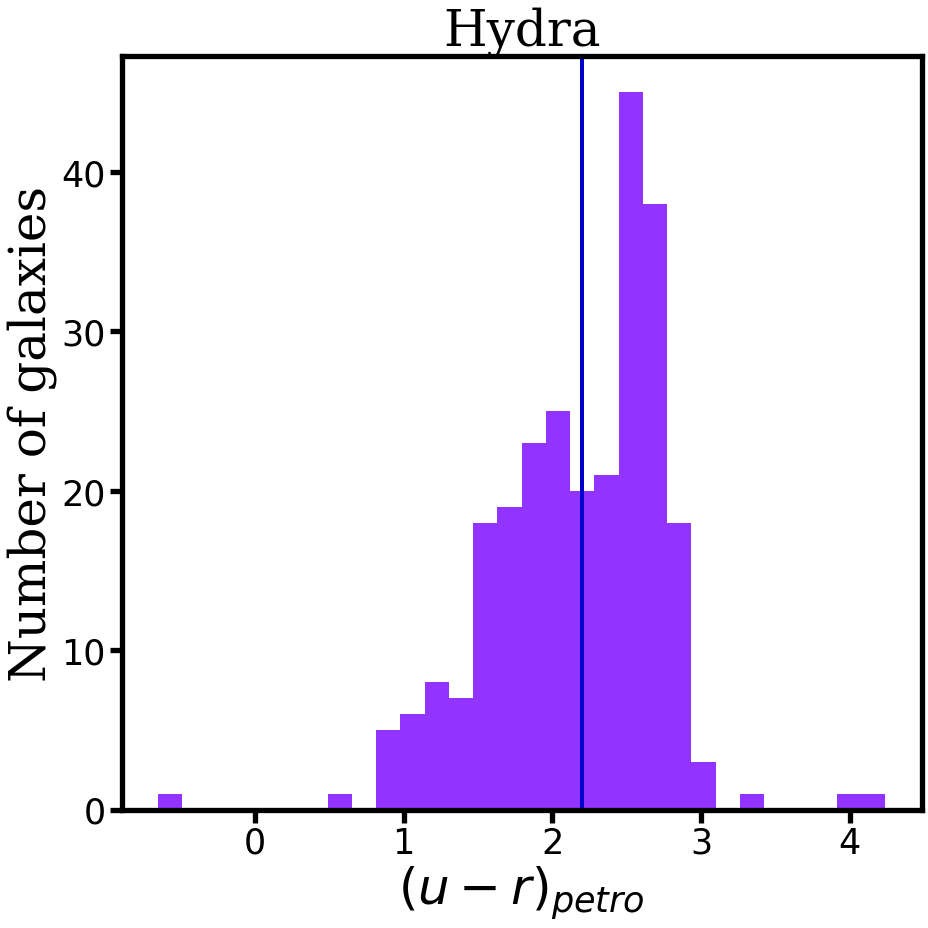

In [35]:
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111)


ax.hist((u_petro_hydra - r_petro_hydra)[(pmem_hydra > pmem_cut_hydra) & (u_petro_hydra < 30)], bins=30, color=colors[3], histtype='stepfilled', alpha=0.8)
# ax.set_title(r"$$".format(mlim), fontsize=25, fontname='fantasy')
ax.set_ylabel("Number of galaxies", fontdict=font)
ax.set_xlabel(r"$(u-r)_{petro}$", fontdict=font)
ax.set_title("Hydra", fontdict=font)
ax.axvline(color_division, color=colors[1], lw=4)

    
fig.tight_layout()
# plt.savefig("../Figures/Dissertation/color-distribution_g-r-v2_photoz0.03.png", format='png')

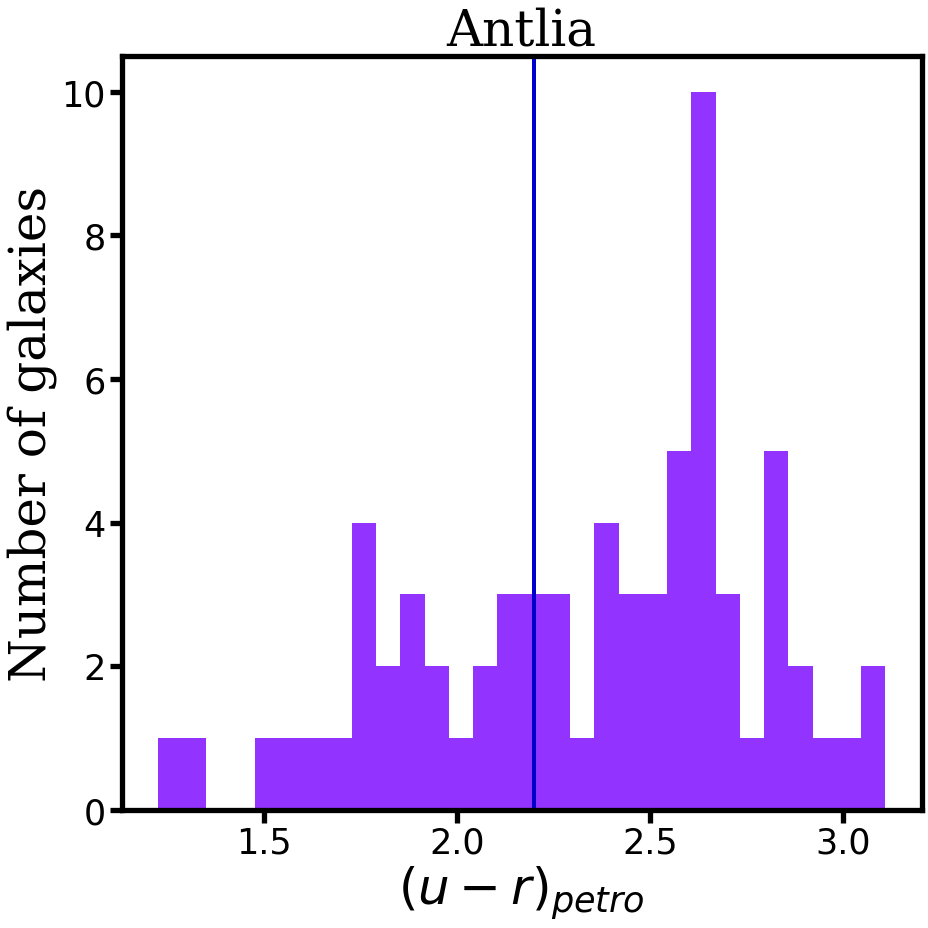

In [36]:
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111)


ax.hist((u_petro_antlia - r_petro_antlia)[(pmem_antlia > pmem_cut_antlia) & (u_petro_antlia < 30)], bins=30, color=colors[3], histtype='stepfilled', alpha=0.8)
# ax.set_title(r"$$".format(mlim), fontsize=25, fontname='fantasy')
ax.set_ylabel("Number of galaxies", fontdict=font)
ax.set_xlabel(r"$(u-r)_{petro}$", fontdict=font)
ax.set_title("Antlia", fontdict=font)
ax.axvline(color_division, color=colors[1], lw=4)

    
fig.tight_layout()
# plt.savefig("../Figures/Dissertation/color-distribution_g-r-v2_photoz0.03.png", format='png')

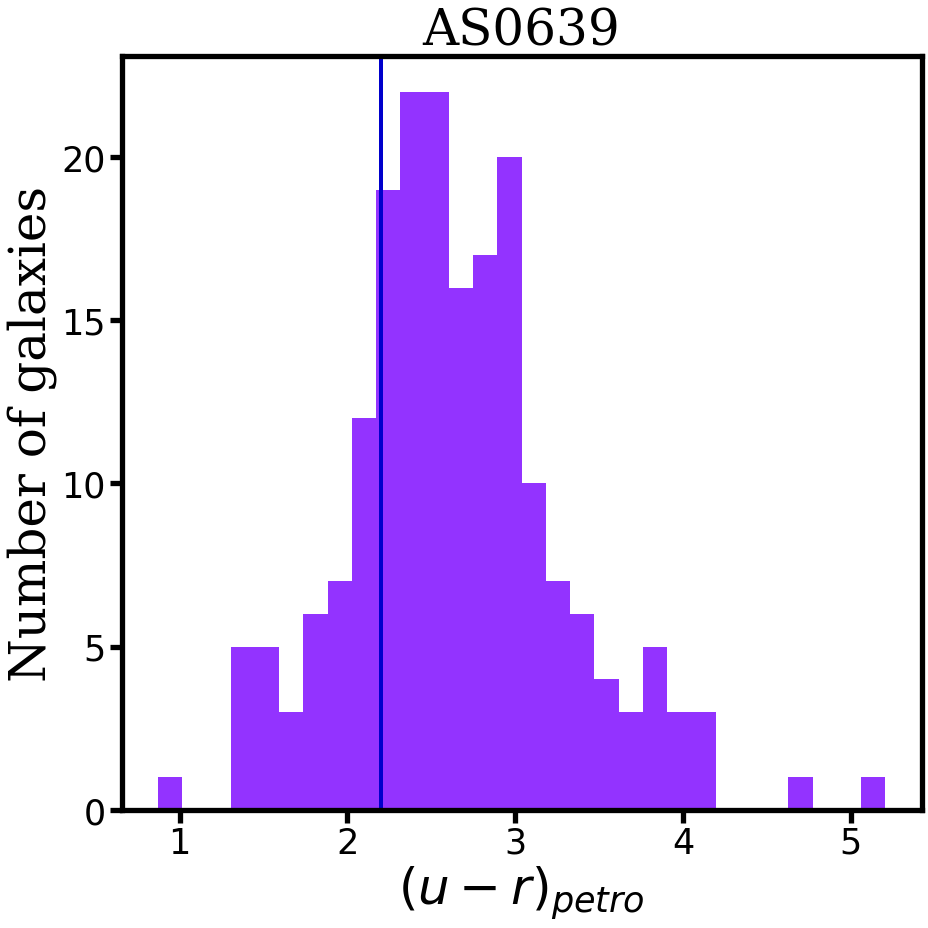

In [37]:
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111)

ax.hist((u_petro_as0639 - r_petro_as0639)[(pmem_as0639 > pmem_cut_as0639) & (u_petro_as0639 < 30)], bins=30, color=colors[3], histtype='stepfilled', alpha=0.8)
# ax.set_title(r"$$".format(mlim), fontsize=25, fontname='fantasy')
ax.set_ylabel("Number of galaxies", fontdict=font)
ax.set_xlabel(r"$(u-r)_{petro}$", fontdict=font)
ax.set_title("AS0639", fontdict=font)
ax.axvline(color_division, color=colors[1], lw=4)

    
fig.tight_layout()
# plt.savefig("../Figures/Dissertation/color-distribution_g-r-v2_photoz0.03.png", format='png')

### Color fractions

In [38]:
red_fraction_hydra = np.sum((u_petro_hydra - r_petro_hydra)[(pmem_hydra > pmem_cut_hydra) & 
                                                                (u_petro_hydra < 30)] > 2.2) / np.sum((pmem_hydra > pmem_cut_hydra) & (u_petro_hydra < 30))
blue_fraction_hydra = 1 - red_fraction_hydra

In [40]:
red_fraction_antlia = np.sum((u_petro_antlia - r_petro_antlia)[(pmem_antlia > pmem_cut_antlia) & 
                                                                (u_petro_antlia < 30)] > 2.2) / np.sum((pmem_antlia > pmem_cut_antlia) & (u_petro_antlia < 30))
blue_fraction_antlia = 1 - red_fraction_antlia

In [41]:
red_fraction_as0639 = np.sum((u_petro_as0639 - r_petro_as0639)[(pmem_as0639 > pmem_cut_as0639) & 
                                                                (u_petro_as0639 < 30)] > 2.2) / np.sum((pmem_as0639 > pmem_cut_as0639) & (u_petro_as0639 < 30))
blue_fraction_as0639 = 1 - red_fraction_as0639

In [46]:
red_fraction = np.array([red_fraction_hydra, red_fraction_antlia, red_fraction_as0639])
blue_fraction = 1 - red_fraction

In [47]:
red_fraction

array([0.52873563, 0.64285714, 0.77272727])

### Peak densities
Calculated in the KNN density jupyter notebook

In [44]:
peak_densities = np.array([451478.5469050651, 440112.8692861373, 354762.22135703464])

### Plot

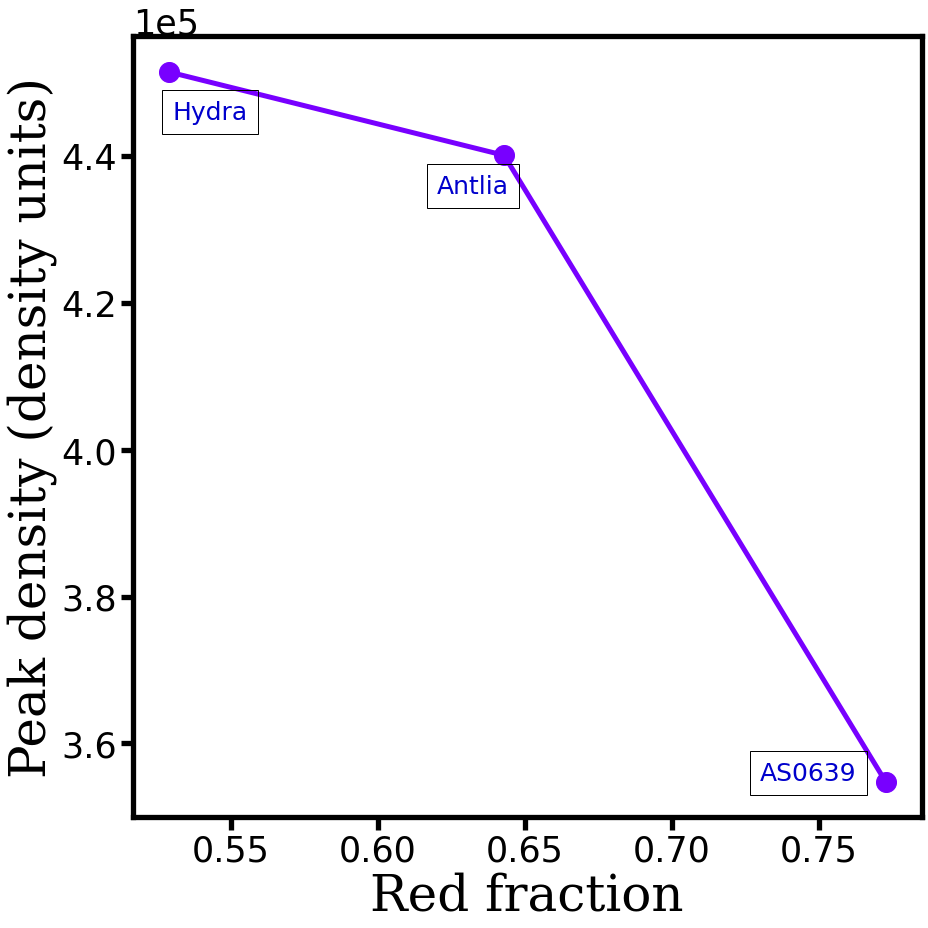

In [66]:
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111)


ax.plot(red_fraction, peak_densities, color=colors[3], marker='o', markersize=20, lw=5)
ax.set_ylabel("Peak density (density units)", fontdict=font)
ax.set_xlabel("Red fraction", fontdict=font)
# ax.set_title("Antlia", fontdict=font)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax.text(0.53, 4.45e5, 'Hydra', fontsize=25, color=colors[1], bbox=dict(facecolor='none', edgecolor='black', pad=10.0))
ax.text(0.62, 4.35e5, 'Antlia', fontsize=25, color=colors[1], bbox=dict(facecolor='none', edgecolor='black', pad=10.0))
ax.text(0.73, 3.55e5, 'AS0639', fontsize=25, color=colors[1], bbox=dict(facecolor='none', edgecolor='black', pad=10.0))

    
fig.tight_layout()